<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.241940,44.406076,-15.134610,83.513405,89.187740,-5.674335
1,0.0,1.0,51.194901,57.340688,-45.037809,73.497780,111.005892,-37.508112
2,0.0,2.0,72.088535,86.213313,53.639600,221.941448,164.996212,56.945236
3,0.0,3.0,26.740021,46.347347,31.034046,114.121415,74.211494,39.909921
4,0.0,4.0,77.479384,38.287210,-1.783136,123.983458,114.812695,9.170763
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.569827,70.535775,45.194662,175.300264,132.011461,43.288803
29996,999.0,26.0,77.474783,96.321288,-31.246722,152.549349,176.435209,-23.885861
29997,999.0,27.0,85.664954,71.307053,19.722150,186.694158,165.012807,21.681351
29998,999.0,28.0,67.587305,49.760528,12.781646,140.129479,132.598780,7.530699


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    44.241940  44.406076 -15.134610   83.513405   89.187740   
      1.0    51.194901  57.340688 -45.037809   73.497780  111.005892   
      2.0    72.088535  86.213313  53.639600  221.941448  164.996212   
      3.0    26.740021  46.347347  31.034046  114.121415   74.211494   
      4.0    77.479384  38.287210  -1.783136  123.983458  114.812695   
...                ...        ...        ...         ...         ...   
999.0 25.0   49.569827  70.535775  45.194662  175.300264  132.011461   
      26.0   77.474783  96.321288 -31.246722  152.549349  176.435209   
      27.0   85.664954  71.307053  19.722150  186.694158  165.012807   
      28.0   67.587305  49.760528  12.781646  140.129479  132.598780   
      29.0   92.385298  62.958635  13.511294  178.855227  164.781838   

                 e_hat  
rep   index             
0.0   0.0    -5.674335  
      1.0   -37.508112  
      2.0    56.945236  
      3.0    39.909921  
      4.0     9.170763  
...                ...  
999.0 25.0   43.288803  
      26.0  -23.885861  
      27.0   21.681351  
      28.0    7.530699  
      29.0   14.073390  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    44.241940  44.406076 -15.134610   83.513405   89.187740   
      1.0    51.194901  57.340688 -45.037809   73.497780  111.005892   
      2.0    72.088535  86.213313  53.639600  221.941448  164.996212   
      3.0    26.740021  46.347347  31.034046  114.121415   74.211494   
      4.0    77.479384  38.287210  -1.783136  123.983458  114.812695   
...                ...        ...        ...         ...         ...   
999.0 25.0   49.569827  70.535775  45.194662  175.300264  132.011461   
      26.0   77.474783  96.321288 -31.246722  152.549349  176.435209   
      27.0   85.664954  71.307053  19.722150  186.694158  165.012807   
      28.0   67.587305  49.760528  12.781646  140.129479  132.598780   
      29.0   92.385298  62.958635  13.511294  178.855227  164.781838   

                 e_hat  
rep   index             
0.0   0.0    -5.674335  
      1.0   -37.508112  
      2.0    56.945236  
      3.0    39.909921  
      4.0     9.170763  
...                ...  
999.0 25.0   43.288803  
      26.0  -23.885861  
      27.0   21.681351  
      28.0    7.530699  
      29.0   14.073390  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.241940,44.406076,-15.134610,83.513405,89.187740,-5.674335
1,0.0,1.0,51.194901,57.340688,-45.037809,73.497780,111.005892,-37.508112
2,0.0,2.0,72.088535,86.213313,53.639600,221.941448,164.996212,56.945236
3,0.0,3.0,26.740021,46.347347,31.034046,114.121415,74.211494,39.909921
4,0.0,4.0,77.479384,38.287210,-1.783136,123.983458,114.812695,9.170763
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.569827,70.535775,45.194662,175.300264,132.011461,43.288803
29996,999.0,26.0,77.474783,96.321288,-31.246722,152.549349,176.435209,-23.885861
29997,999.0,27.0,85.664954,71.307053,19.722150,186.694158,165.012807,21.681351
29998,999.0,28.0,67.587305,49.760528,12.781646,140.129479,132.598780,7.530699


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    44.241940  44.406076 -15.134610   83.513405   89.187740   
      1.0    51.194901  57.340688 -45.037809   73.497780  111.005892   
      2.0    72.088535  86.213313  53.639600  221.941448  164.996212   
      3.0    26.740021  46.347347  31.034046  114.121415   74.211494   
      4.0    77.479384  38.287210  -1.783136  123.983458  114.812695   
...                ...        ...        ...         ...         ...   
999.0 25.0   49.569827  70.535775  45.194662  175.300264  132.011461   
      26.0   77.474783  96.321288 -31.246722  152.549349  176.435209   
      27.0   85.664954  71.307053  19.722150  186.694158  165.012807   
      28.0   67.587305  49.760528  12.781646  140.129479  132.598780   
      29.0   92.385298  62.958635  13.511294  178.855227  164.781838   

                 e_hat  
rep   index             
0.0   0.0    -5.674335  
      1.0   -37.508112  
      2.0    56.945236  
      3.0    39.909921  
      4.0     9.170763  
...                ...  
999.0 25.0   43.288803  
      26.0  -23.885861  
      27.0   21.681351  
      28.0    7.530699  
      29.0   14.073390  

[30000 rows x 6 columns]

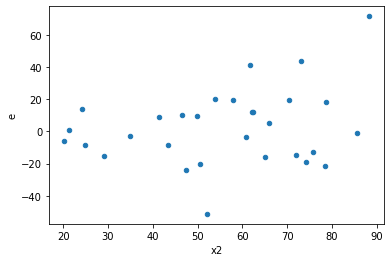

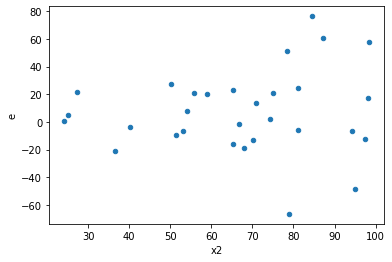

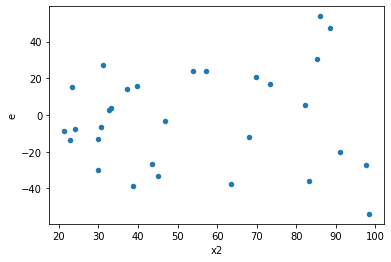

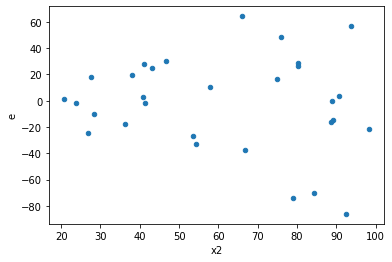

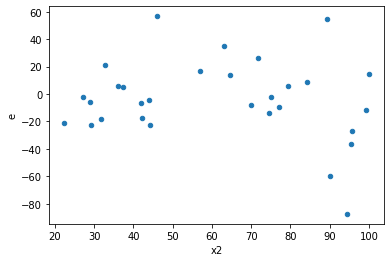

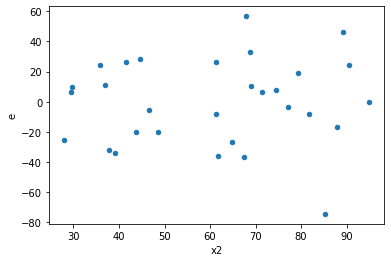

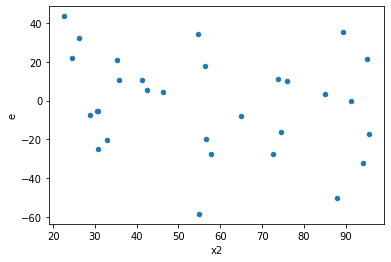

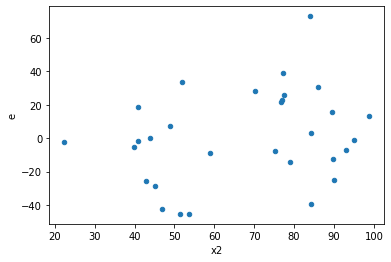

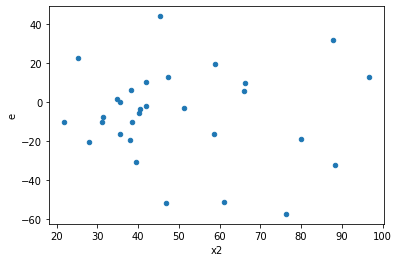

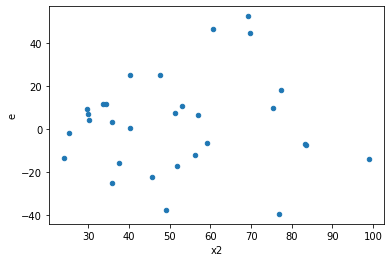

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,17.0,9.0,19457.608644545522,13379.60443289351,1144.5652143850307,1486.6227147659456,1.2988536573380842,0.7092337740750427,0.6453831129624786,0.35461688703752137,Reject005=1 : Homoscedasticity
1.0,11.0,15.0,6851.699510406347,20030.480782351133,622.8817736733043,1335.3653854900756,2.143850473606027,0.17017484187990983,0.9149125790600451,0.08508742093995492,Reject005=1 : Homoscedasticity
2.0,12.0,14.0,4645.271726337334,9154.406862466474,387.10597719477784,653.886204461891,1.6891658692546587,0.3473677741729526,0.8263161129135237,0.1736838870864763,Reject005=1 : Homoscedasticity
3.0,14.0,12.0,8812.666960332106,11330.83824620657,629.4762114522933,944.2365205172141,1.5000352727209862,0.4873440736868744,0.7563279631565628,0.2436720368434372,Reject005=1 : Homoscedasticity
4.0,19.0,7.0,16746.320334562235,9688.101908471623,881.3852807664334,1384.014558353089,1.5702719214343812,0.5594675494922603,0.7202662252538699,0.27973377474613015,Reject005=1 : Homoscedasticity
8.0,9.0,17.0,1172.726485405383,9854.46524416579,130.30294282282034,579.6744261273994,4.448667187168695,0.007979122580301201,0.9960104387098494,0.003989561290150601,Reject005=0 : Heteroscedasticity
9.0,13.0,13.0,7467.795207236428,7488.587835224566,574.4457851720329,576.0452180941974,1.0027843061320147,0.9960767194506268,0.5019616402746866,0.4980383597253134,Reject005=1 : Homoscedasticity
11.0,4.0,22.0,1125.679094339647,22610.941189395802,281.41977358491175,1027.7700540634455,3.6520889807103063,0.03979646202110332,0.9801017689894483,0.01989823101055166,Reject005=0 : Heteroscedasticity
12.0,16.0,10.0,9205.79595363387,7207.281576332477,575.3622471021168,720.7281576332477,1.252651110258423,0.734266175560188,0.632866912219906,0.367133087780094,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,17.0,9.0,19457.608644545522,13379.60443289351,1144.5652143850307,1486.6227147659456,1.2988536573380842,0.7092337740750427,Reject005=1 : Homoscedasticity
1.0,11.0,15.0,6851.699510406347,20030.480782351133,622.8817736733043,1335.3653854900756,2.143850473606027,0.17017484187990983,Reject005=1 : Homoscedasticity
2.0,12.0,14.0,4645.271726337334,9154.406862466474,387.10597719477784,653.886204461891,1.6891658692546587,0.3473677741729526,Reject005=1 : Homoscedasticity
3.0,14.0,12.0,8812.666960332106,11330.83824620657,629.4762114522933,944.2365205172141,1.5000352727209862,0.4873440736868744,Reject005=1 : Homoscedasticity
4.0,19.0,7.0,16746.320334562235,9688.101908471623,881.3852807664334,1384.014558353089,1.5702719214343812,0.5594675494922603,Reject005=1 : Homoscedasticity
5.0,16.0,10.0,8570.023985642443,1391.1552458153906,535.6264991026527,139.11552458153906,0.25972487323648563,0.016450431158308382,Reject005=0 : Heteroscedasticity
6.0,12.0,14.0,14815.287527450813,8764.90704865333,1234.6072939542344,626.0647891895235,0.5070962987626177,0.24521815441681405,Reject005=1 : Homoscedasticity
7.0,14.0,12.0,11043.259535162828,3788.939785207633,788.8042525116306,315.7449821006361,0.4002830627437326,0.10516725702339423,Reject005=1 : Homoscedasticity
8.0,9.0,17.0,1172.726485405383,9854.46524416579,130.30294282282034,579.6744261273994,4.448667187168695,0.007979122580301201,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      694
Reject005=0 : Heteroscedasticity    306
Name: Result_test, dtype: int64